# **Библиотеки**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# **Настройка визуализации**

In [36]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# **Загрузка данных**

In [37]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

Train shape: (29100, 19)
Test shape: (28050, 18)


# **Самый базовый EDA для train**

In [38]:
display(train.head())

,dt,price_p05,price_p95,n_stores,precpt,avg_temperature,avg_humidity,avg_wind_level,holiday_flag,activity_flag,management_group_id,first_category_id,second_category_id,third_category_id,dow,day_of_month,week_of_year,month,product_id
0,2024-03-28,1.136102,1.167625,-0.588881,-0.298690,-1.936029,0.621756,-0.439349,0,0,6,8,2,76,3,28,13,3,0
1,2024-03-29,1.133129,1.133590,-0.646402,0.074779,-2.090906,0.756995,-0.759561,0,0,6,8,33,77,4,29,13,3,0
2,2024-03-30,1.134522,1.165849,-0.636272,-0.644614,-1.825121,0.577839,0.122226,1,0,6,8,72,76,5,30,13,3,0
3,2024-03-31,1.152592,1.153091,-0.579004,-0.614834,-1.817634,0.589653,-0.520220,1,0,6,8,21,77,6,31,13,3,0
4,2024-04-01,1.166641,1.167096,-0.623265,-0.116090,-1.892973,0.689895,-1.036820,0,0,6,8,50,76,0,1,14,4,0


In [39]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29100 entries, 0 to 29099
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   29100 non-null  object 
 1   price_p05            29100 non-null  float64
 2   price_p95            29100 non-null  float64
 3   n_stores             29100 non-null  float64
 4   precpt               29100 non-null  float64
 5   avg_temperature      29100 non-null  float64
 6   avg_humidity         29100 non-null  float64
 7   avg_wind_level       29100 non-null  float64
 8   holiday_flag         29100 non-null  int64  
 9   activity_flag        29100 non-null  int64  
 10  management_group_id  29100 non-null  int64  
 11  first_category_id    29100 non-null  int64  
 12  second_category_id   29100 non-null  int64  
 13  third_category_id    29100 non-null  int64  
 14  dow                  29100 non-null  int64  
 15  day_of_month         29100 non-null 

None

In [40]:
display(train.describe().T)

,count,mean,std,min,25%,50%,75%,max
price_p05,29100.0,1.021477,0.246938,0.000000,0.913598,1.038869,1.143169,3.512162
price_p95,29100.0,1.116897,0.238082,0.000109,1.088465,1.142148,1.173151,3.546587
n_stores,29100.0,-0.002295,0.989934,-0.749200,-0.582488,-0.441623,0.133566,5.975207
precpt,29100.0,-0.186648,0.961778,-1.139015,-0.680611,-0.480054,-0.167565,6.458323
avg_temperature,29100.0,-0.474845,0.847154,-2.566182,-1.168266,-0.498593,0.197678,1.233543
avg_humidity,29100.0,-0.050176,1.018483,-3.333128,-0.170897,0.313721,0.532944,1.276349
avg_wind_level,29100.0,0.060413,1.103594,-2.467447,-0.756115,-0.032140,0.747768,5.164815
holiday_flag,29100.0,0.366667,0.481903,0.000000,0.000000,0.000000,1.000000,1.000000
activity_flag,29100.0,0.548866,0.497615,0.000000,0.000000,1.000000,1.000000,1.000000
management_group_id,29100.0,3.756873,2.331366,0.000000,1.000000,5.000000,6.000000,6.000000


In [41]:
display(train.nunique())

dt                        60
price_p05              28997
price_p95              29100
n_stores               29100
precpt                 29100
avg_temperature        29100
avg_humidity           29100
avg_wind_level         29100
holiday_flag               2
activity_flag              2
management_group_id        7
first_category_id         29
second_category_id        76
third_category_id        197
dow                        7
day_of_month              31
week_of_year               9
month                      3
product_id               485
dtype: int64

In [42]:
display(train.isnull().sum())

dt                     0
price_p05              0
price_p95              0
n_stores               0
precpt                 0
avg_temperature        0
avg_humidity           0
avg_wind_level         0
holiday_flag           0
activity_flag          0
management_group_id    0
first_category_id      0
second_category_id     0
third_category_id      0
dow                    0
day_of_month           0
week_of_year           0
month                  0
product_id             0
dtype: int64

In [43]:
display(train[train.duplicated()])

,dt,price_p05,price_p95,n_stores,precpt,avg_temperature,avg_humidity,avg_wind_level,holiday_flag,activity_flag,management_group_id,first_category_id,second_category_id,third_category_id,dow,day_of_month,week_of_year,month,product_id


In [45]:
# palette = sns.color_palette("husl", len(train.columns))
# for i, column in enumerate(train.columns):
#     plt.figure(figsize=(8, 6))
    
#     # Проверяем тип данных столбца
#     if train[column].dtype in ['int64', 'float64']:  # Числовые переменные
#         sns.histplot(train[column], kde=True, color=palette[i], bins=30)
#         plt.title(f'Распределение числовой переменной: {column}')
#     elif train[column].dtype == 'object':  # Категориальные переменные
#         sns.countplot(data=train, x=column, palette=[palette[i]])
#         plt.title(f'Распределение категорий в переменной: {column}')
#         plt.xticks(rotation=45)
#     else:
#         plt.title(f'Переменная {column} имеет неподдерживаемый тип: {train[column].dtype}')
    
#     plt.xlabel(column)
#     plt.ylabel('Частота')
#     plt.tight_layout()
#     plt.show()

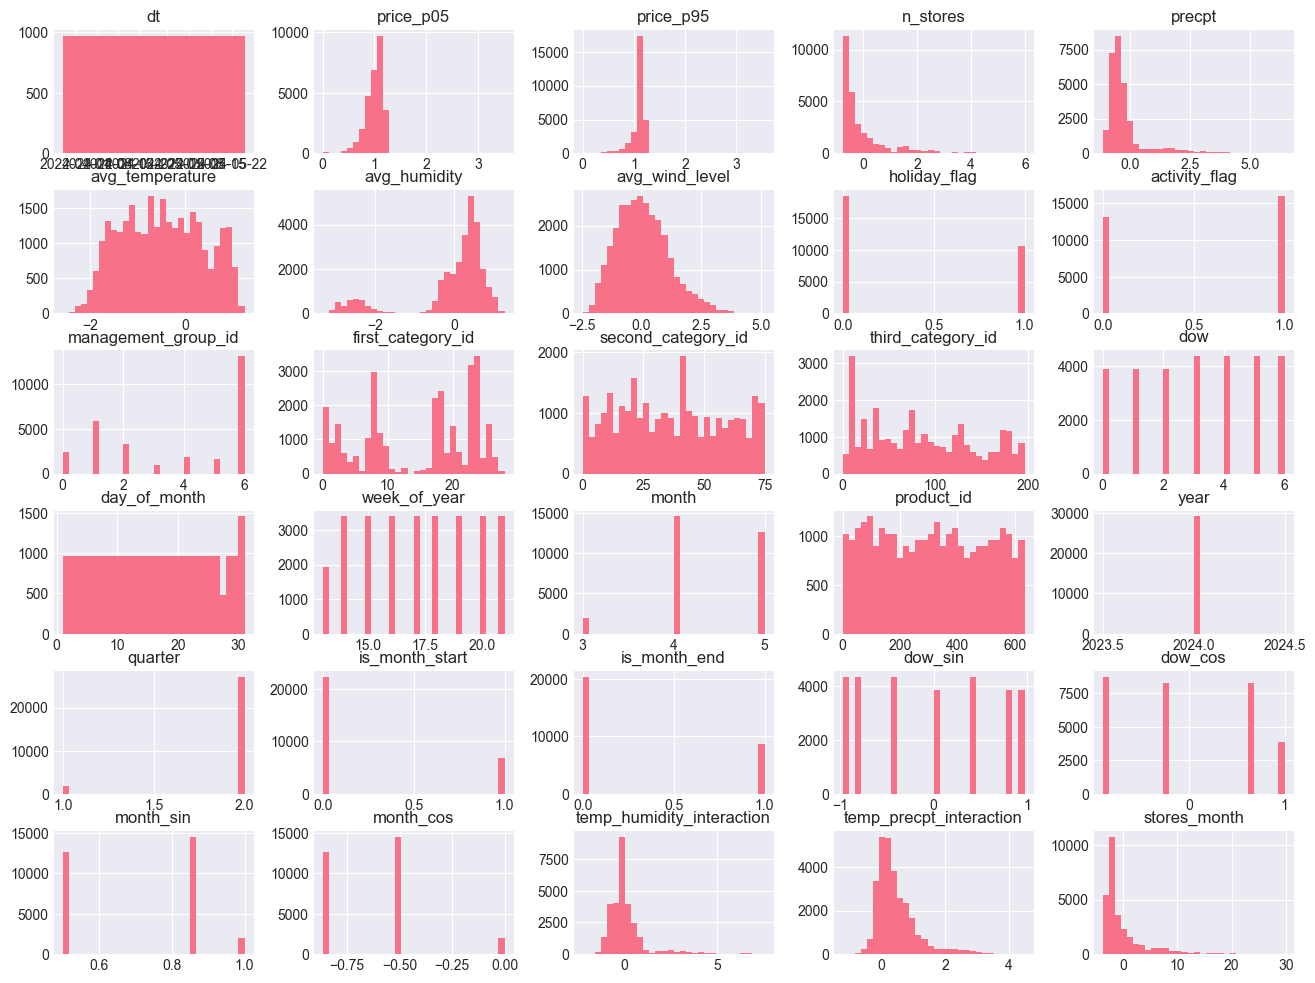

In [ ]:
# Гистограммы для всех числовых столбцов
train.hist(figsize=(16, 12), bins=30)
plt.show()

# Анализ категориальных признаков
for col in train.select_dtypes(include=['object']).columns:
    sns.countplot(y=col, data=train, order=train[col].value_counts().index)
    plt.title(f'Распределение значений в столбце {col}')
    plt.show()

In [47]:
# numeric_columns = train.select_dtypes(include=['number'])

# # Построение Pairplot
# sns.pairplot(numeric_columns, diag_kind='kde', kind='scatter', plot_kws={'alpha': 0.7, 's': 50})
# plt.suptitle('Диаграммы рассеяния для всех пар переменных', y=1.02, fontsize=16)
# plt.show()

# **Самый базовый EDA для test**

In [6]:
display(test.head())

,dt,n_stores,precpt,avg_temperature,avg_humidity,avg_wind_level,holiday_flag,activity_flag,management_group_id,first_category_id,second_category_id,third_category_id,dow,day_of_month,week_of_year,month,product_id,row_id
0,2024-05-27,-0.336440,0.966715,0.619788,0.455497,0.011164,0,0,0,9,72,68,0,27,22,5,113,0
1,2024-05-28,-0.341302,0.970148,0.685420,0.231812,0.044739,0,1,0,9,51,68,1,28,22,5,113,1
2,2024-05-29,-0.467158,0.539593,0.671440,0.240995,-0.060100,0,1,0,9,40,67,2,29,22,5,113,2
3,2024-05-30,-0.401540,0.642576,0.783643,0.315695,0.734004,0,1,0,9,13,68,3,30,22,5,113,3
4,2024-05-31,-0.340411,1.802759,0.771879,0.542002,0.497394,0,1,0,9,29,68,4,31,22,5,113,4


In [8]:
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28050 entries, 0 to 28049
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   28050 non-null  object 
 1   n_stores             28050 non-null  float64
 2   precpt               28050 non-null  float64
 3   avg_temperature      28050 non-null  float64
 4   avg_humidity         28050 non-null  float64
 5   avg_wind_level       28050 non-null  float64
 6   holiday_flag         28050 non-null  int64  
 7   activity_flag        28050 non-null  int64  
 8   management_group_id  28050 non-null  int64  
 9   first_category_id    28050 non-null  int64  
 10  second_category_id   28050 non-null  int64  
 11  third_category_id    28050 non-null  int64  
 12  dow                  28050 non-null  int64  
 13  day_of_month         28050 non-null  int64  
 14  week_of_year         28050 non-null  int64  
 15  month                28050 non-null 

None

In [11]:
display(test.describe().T)

,count,mean,std,min,25%,50%,75%,max
n_stores,28050.0,0.170069,1.012834,-0.700023,-0.408201,-0.254154,0.308590,6.218397
precpt,28050.0,0.360993,1.014146,-1.015505,-0.431915,-0.071554,1.039345,6.354048
avg_temperature,28050.0,0.660572,0.929305,-2.437501,0.187175,0.920270,1.338201,2.281394
avg_humidity,28050.0,0.220229,0.984939,-3.124323,-0.005682,0.533829,0.877005,1.655064
avg_wind_level,28050.0,0.104777,0.876554,-2.290066,-0.521911,0.031010,0.619899,4.177940
holiday_flag,28050.0,0.321390,0.467019,0.000000,0.000000,0.000000,1.000000,1.000000
activity_flag,28050.0,0.555829,0.496882,0.000000,0.000000,1.000000,1.000000,1.000000
management_group_id,28050.0,3.498966,2.405936,0.000000,1.000000,4.000000,6.000000,6.000000
first_category_id,28050.0,15.858217,8.615633,0.000000,8.000000,18.000000,24.000000,28.000000
second_category_id,28050.0,35.762602,21.687141,0.000000,18.000000,35.000000,54.000000,75.000000


In [13]:
display(test.nunique())

dt                        90
n_stores               28050
precpt                 28050
avg_temperature        28050
avg_humidity           28050
avg_wind_level         28050
holiday_flag               2
activity_flag              2
management_group_id        7
first_category_id         29
second_category_id        76
third_category_id        197
dow                        7
day_of_month              31
week_of_year              14
month                      4
product_id               635
row_id                 28050
dtype: int64

In [15]:
display(test.isnull().sum())

dt                     0
n_stores               0
precpt                 0
avg_temperature        0
avg_humidity           0
avg_wind_level         0
holiday_flag           0
activity_flag          0
management_group_id    0
first_category_id      0
second_category_id     0
third_category_id      0
dow                    0
day_of_month           0
week_of_year           0
month                  0
product_id             0
row_id                 0
dtype: int64

In [17]:
display(test[test.duplicated()])

,dt,n_stores,precpt,avg_temperature,avg_humidity,avg_wind_level,holiday_flag,activity_flag,management_group_id,first_category_id,second_category_id,third_category_id,dow,day_of_month,week_of_year,month,product_id,row_id


In [46]:
# palette = sns.color_palette("husl", len(test.columns))
# for i, column in enumerate(test.columns):
#     plt.figure(figsize=(8, 6))
    
#     # Проверяем тип данных столбца
#     if test[column].dtype in ['int64', 'float64']:  # Числовые переменные
#         sns.histplot(test[column], kde=True, color=palette[i], bins=30)
#         plt.title(f'Распределение числовой переменной: {column}')
#     elif test[column].dtype == 'object':  # Категориальные переменные
#         sns.countplot(data=test, x=column, palette=[palette[i]])
#         plt.title(f'Распределение категорий в переменной: {column}')
#         plt.xticks(rotation=45)
#     else:
#         plt.title(f'Переменная {column} имеет неподдерживаемый тип: {test[column].dtype}')
    
#     plt.xlabel(column)
#     plt.ylabel('Частота')
#     plt.tight_layout()
#     plt.show()

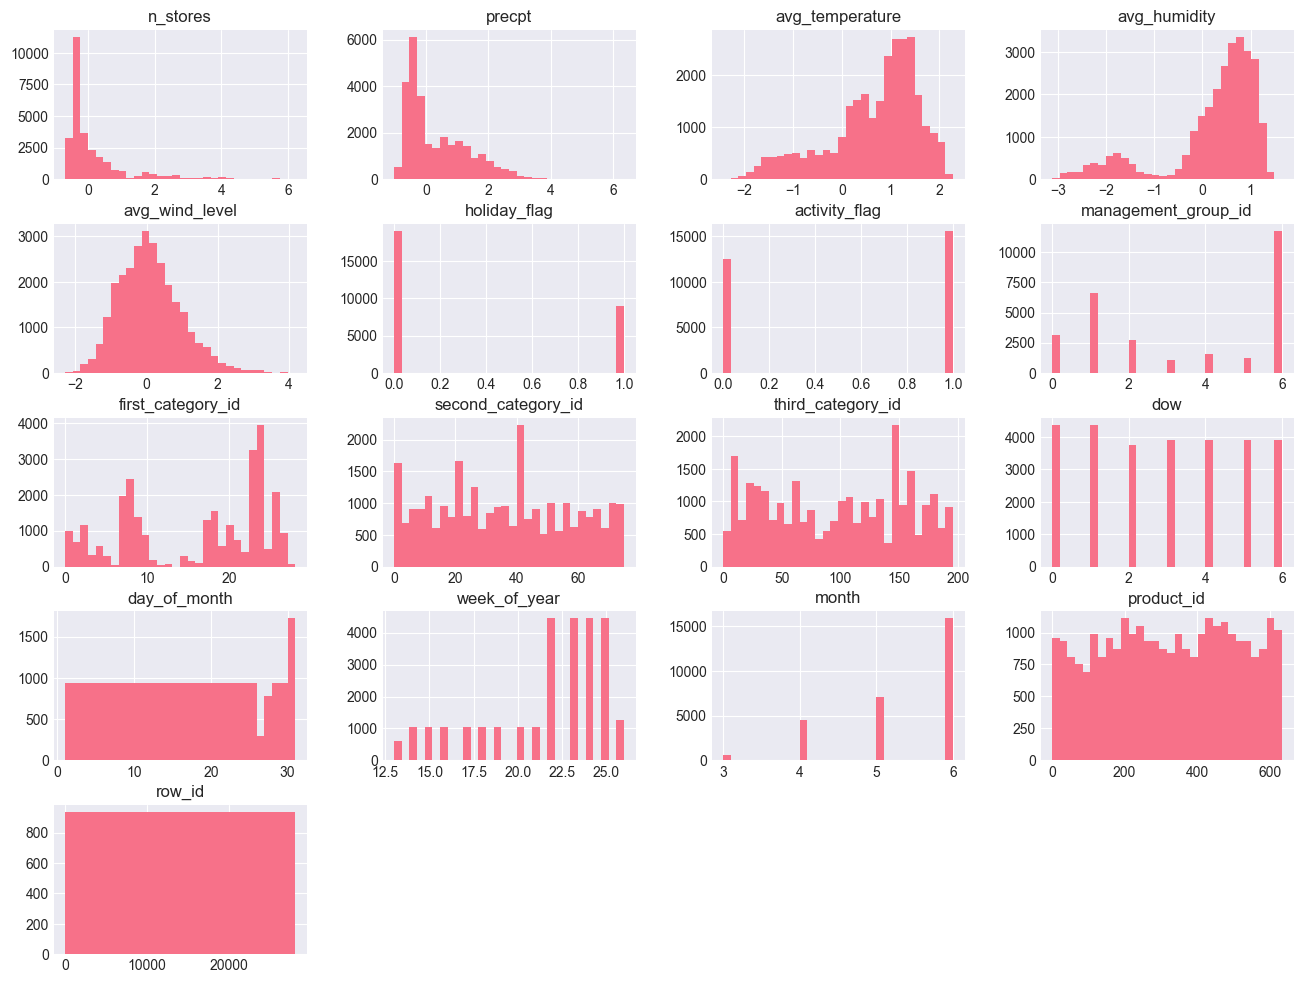

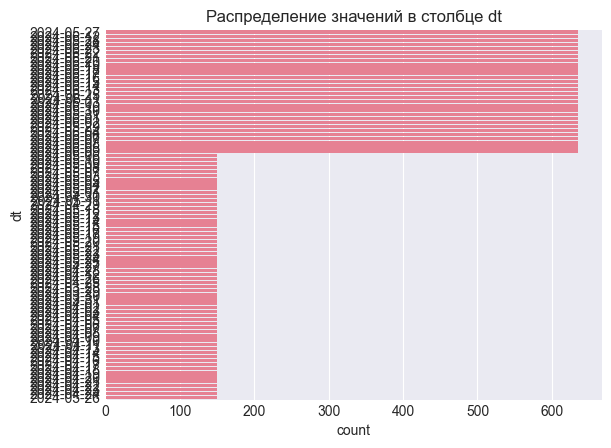

In [32]:
# Гистограммы для всех числовых столбцов
test.hist(figsize=(16, 12), bins=30)
plt.show()

# Анализ категориальных признаков
for col in test.select_dtypes(include=['object']).columns:
    sns.countplot(y=col, data=test, order=test[col].value_counts().index)
    plt.title(f'Распределение значений в столбце {col}')
    plt.show()

In [48]:
# numeric_columns = test.select_dtypes(include=['number'])

# # Построение Pairplot
# sns.pairplot(numeric_columns, diag_kind='kde', kind='scatter', plot_kws={'alpha': 0.7, 's': 50})
# plt.suptitle('Диаграммы рассеяния для всех пар переменных', y=1.02, fontsize=16)
# plt.show()

# **Анализ целевых переменных и выбросов**

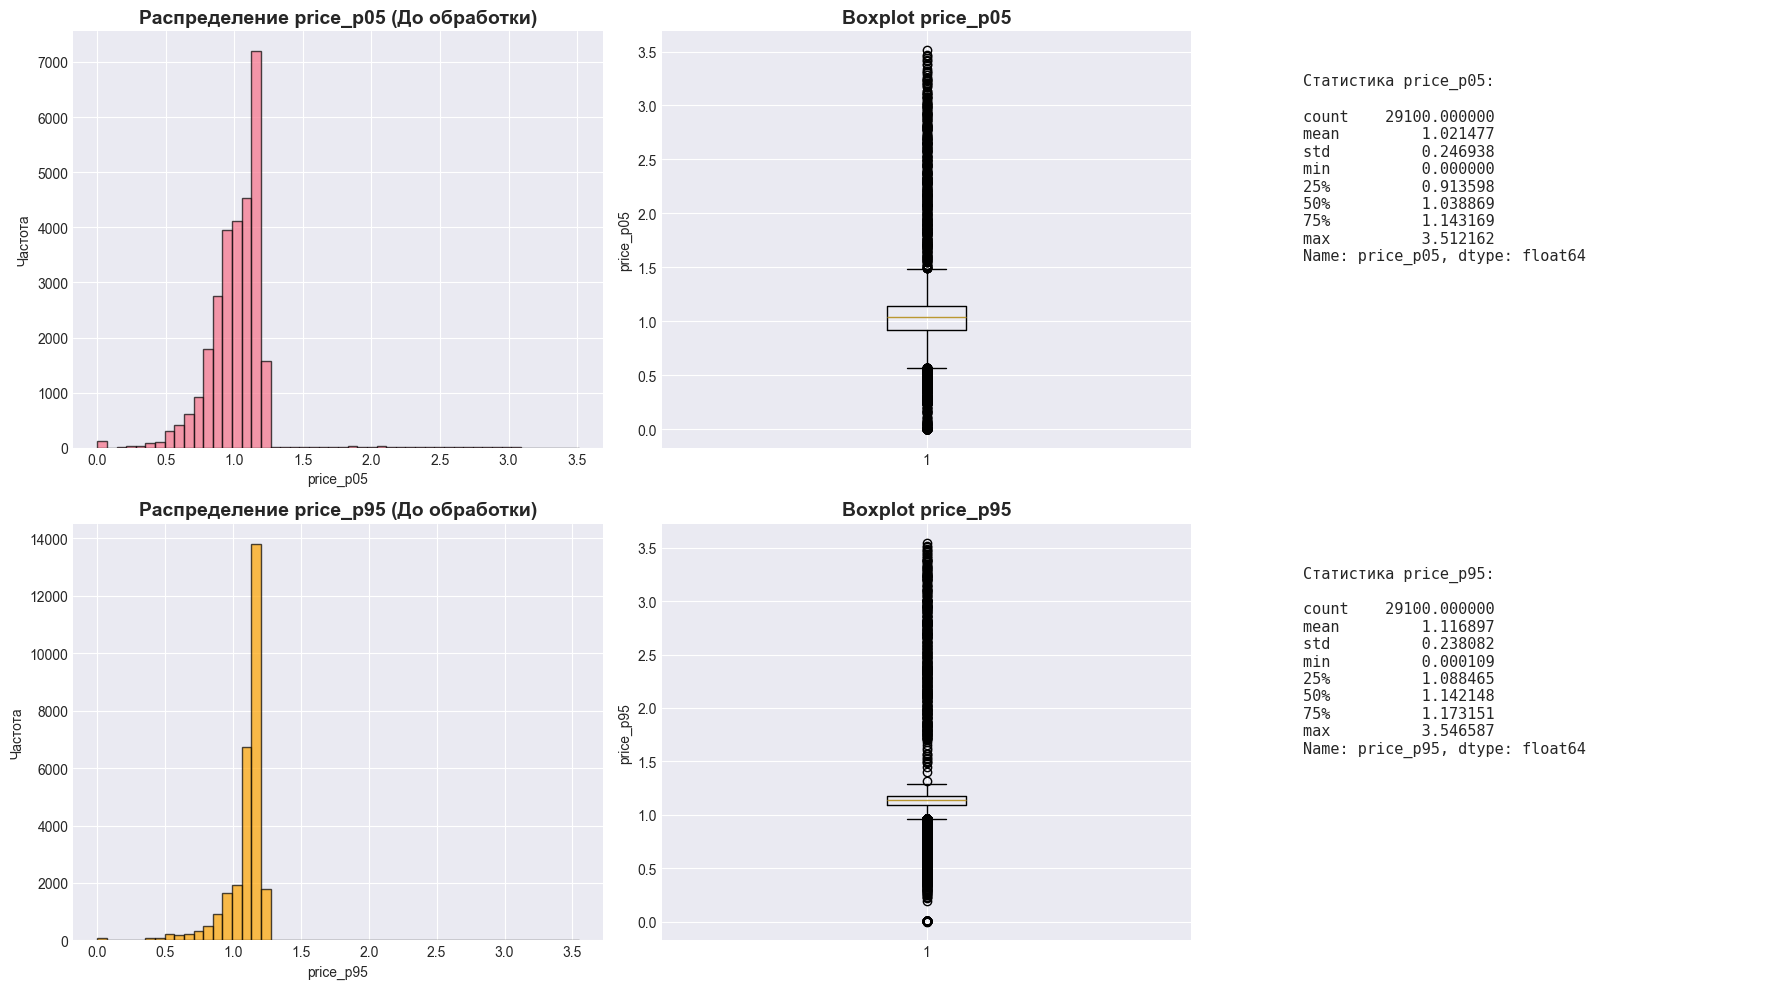

🔍 Ваш код удаляет выбросы методом перцентилей (3% и 97%)
   Выбросы в price_p05: 1746
   Выбросы в price_p95: 1746


In [ ]:
# Визуализация целевых переменных ДО обработки выбросов
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# price_p05
axes[0, 0].hist(train['price_p05'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Распределение price_p05 (До обработки)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('price_p05')
axes[0, 0].set_ylabel('Частота')

axes[0, 1].boxplot(train['price_p05'], vert=True)
axes[0, 1].set_title('Boxplot price_p05', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('price_p05')

stats_p05 = train['price_p05'].describe()
axes[0, 2].axis('off')
axes[0, 2].text(0.1, 0.9, f"Статистика price_p05:\n\n{stats_p05}", 
                fontsize=11, verticalalignment='top', family='monospace')

# price_p95
axes[1, 0].hist(train['price_p95'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1, 0].set_title('Распределение price_p95 (До обработки)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('price_p95')
axes[1, 0].set_ylabel('Частота')

axes[1, 1].boxplot(train['price_p95'], vert=True)
axes[1, 1].set_title('Boxplot price_p95', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('price_p95')

stats_p95 = train['price_p95'].describe()
axes[1, 2].axis('off')
axes[1, 2].text(0.1, 0.9, f"Статистика price_p95:\n\n{stats_p95}", 
                fontsize=11, verticalalignment='top', family='monospace')

plt.tight_layout()
plt.show()

print(f"   Выбросы в price_p05: {(train['price_p05'] < train['price_p05'].quantile(0.03)).sum() + (train['price_p05'] > train['price_p05'].quantile(0.97)).sum()}")
print(f"   Выбросы в price_p95: {(train['price_p95'] < train['price_p95'].quantile(0.03)).sum() + (train['price_p95'] > train['price_p95'].quantile(0.97)).sum()}")


# **Winsorization числовых признаков**

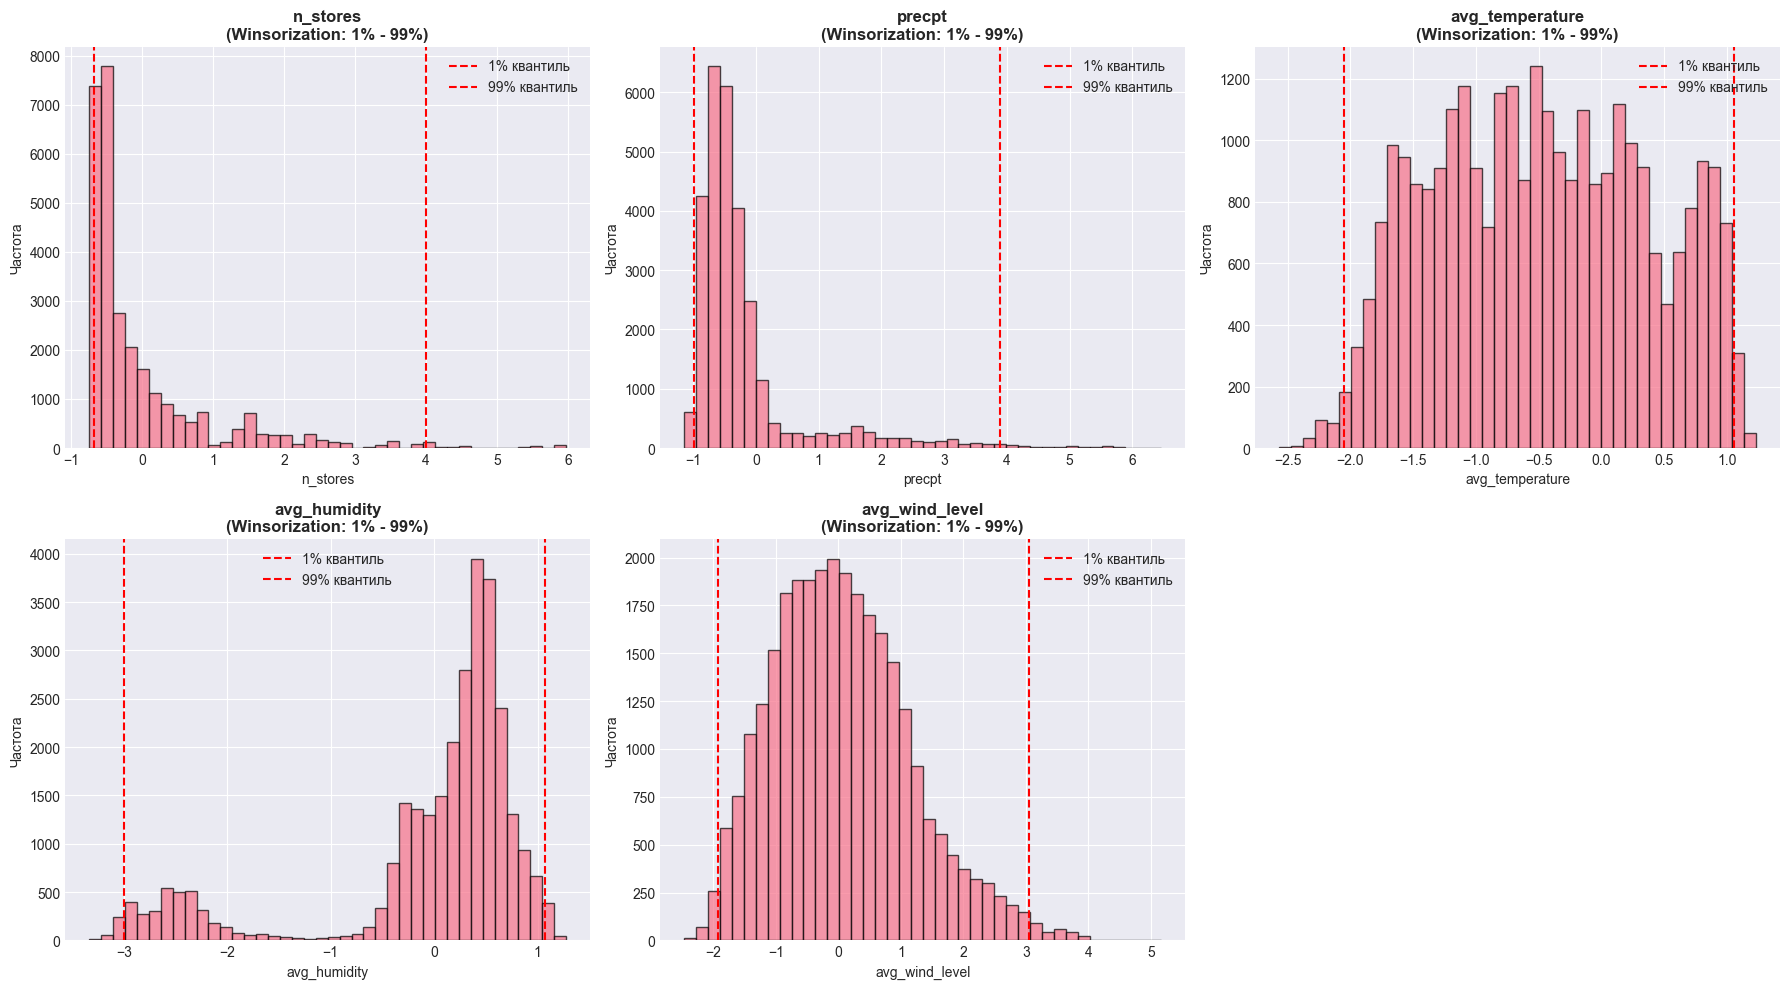

✂️ WINSORIZATION - обрезка экстремальных значений без удаления строк
   Значения < 1% квантиля заменяются на 1% квантиль
   Значения > 99% квантиля заменяются на 99% квантиль


In [ ]:
# Анализ числовых признаков для винзоризации
numeric_cols = ['n_stores', 'precpt', 'avg_temperature', 'avg_humidity', 'avg_wind_level']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    axes[idx].hist(train[col].dropna(), bins=40, edgecolor='black', alpha=0.7)
    axes[idx].axvline(train[col].quantile(0.01), color='r', linestyle='--', label='1% квантиль')
    axes[idx].axvline(train[col].quantile(0.99), color='r', linestyle='--', label='99% квантиль')
    axes[idx].set_title(f'{col}\n(Winsorization: 1% - 99%)', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Частота')
    axes[idx].legend()

axes[-1].axis('off')
plt.tight_layout()
plt.show()

print("   Значения < 1% квантиля заменяются на 1% квантиль")
print("   Значения > 99% квантиля заменяются на 99% квантиль")


# **Временные признаки**

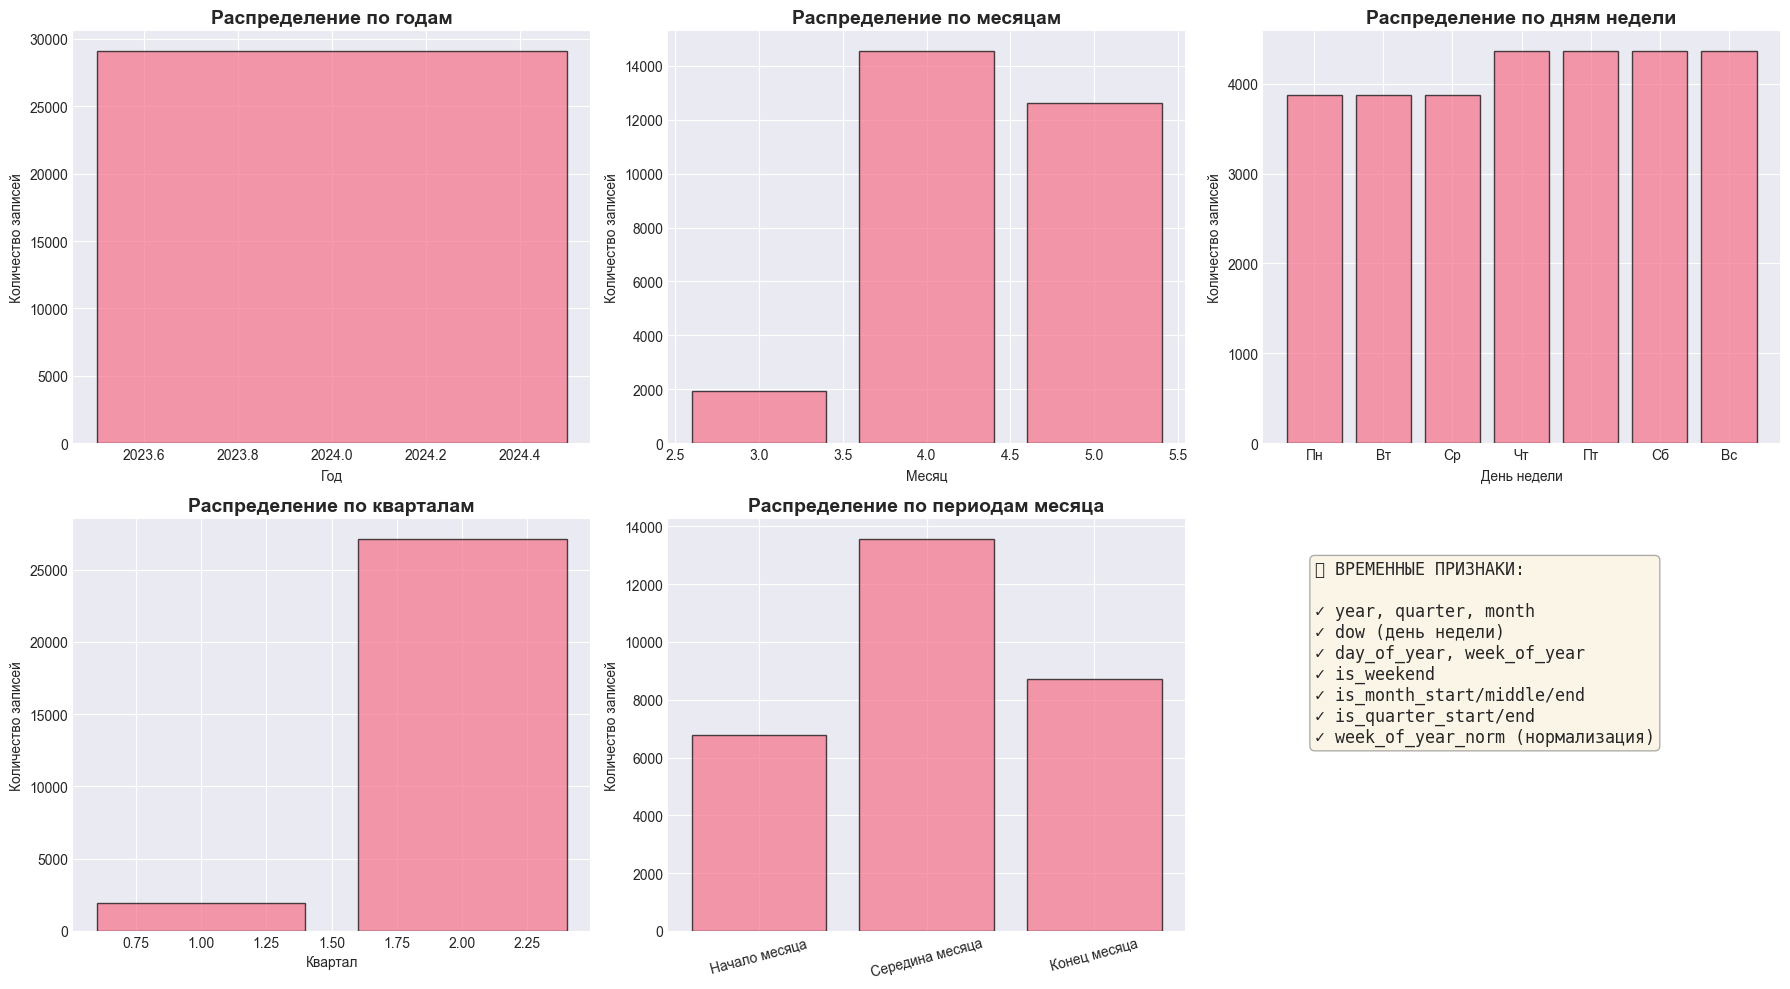

In [21]:
# Создание временных признаков для визуализации
train['dt'] = pd.to_datetime(train['dt'])
train['year'] = train['dt'].dt.year
train['month'] = train['dt'].dt.month
train['quarter'] = train['dt'].dt.quarter
train['dow'] = train['dt'].dt.dayofweek
train['day_of_month'] = train['dt'].dt.day

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Распределение по годам
axes[0, 0].hist(train['year'], bins=len(train['year'].unique()), edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Распределение по годам', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Год')
axes[0, 0].set_ylabel('Количество записей')

# Распределение по месяцам
month_counts = train['month'].value_counts().sort_index()
axes[0, 1].bar(month_counts.index, month_counts.values, edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Распределение по месяцам', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Месяц')
axes[0, 1].set_ylabel('Количество записей')

# Распределение по дням недели
dow_counts = train['dow'].value_counts().sort_index()
dow_names = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
axes[0, 2].bar(range(7), dow_counts.values, tick_label=dow_names, edgecolor='black', alpha=0.7)
axes[0, 2].set_title('Распределение по дням недели', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('День недели')
axes[0, 2].set_ylabel('Количество записей')

# Распределение по кварталам
quarter_counts = train['quarter'].value_counts().sort_index()
axes[1, 0].bar(quarter_counts.index, quarter_counts.values, edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Распределение по кварталам', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Квартал')
axes[1, 0].set_ylabel('Количество записей')

# Флаги начало/конец месяца
train['is_month_start'] = (train['day_of_month'] <= 7).astype(int)
train['is_month_end'] = (train['day_of_month'] >= 22).astype(int)
period_data = pd.DataFrame({
    'Начало месяца': [train['is_month_start'].sum()],
    'Середина месяца': [len(train) - train['is_month_start'].sum() - train['is_month_end'].sum()],
    'Конец месяца': [train['is_month_end'].sum()]
})
axes[1, 1].bar(period_data.columns, period_data.values[0], edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Распределение по периодам месяца', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Количество записей')
axes[1, 1].tick_params(axis='x', rotation=15)

axes[1, 2].axis('off')
axes[1, 2].text(0.1, 0.9, 
                "📅 ВРЕМЕННЫЕ ПРИЗНАКИ:\n\n"
                "✓ year, quarter, month\n"
                "✓ dow (день недели)\n"
                "✓ day_of_year, week_of_year\n"
                "✓ is_weekend\n"
                "✓ is_month_start/middle/end\n"
                "✓ is_quarter_start/end\n"
                "✓ week_of_year_norm (нормализация)", 
                fontsize=12, verticalalignment='top', family='monospace',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.show()


# **Циклические признаки (sin/cos)**

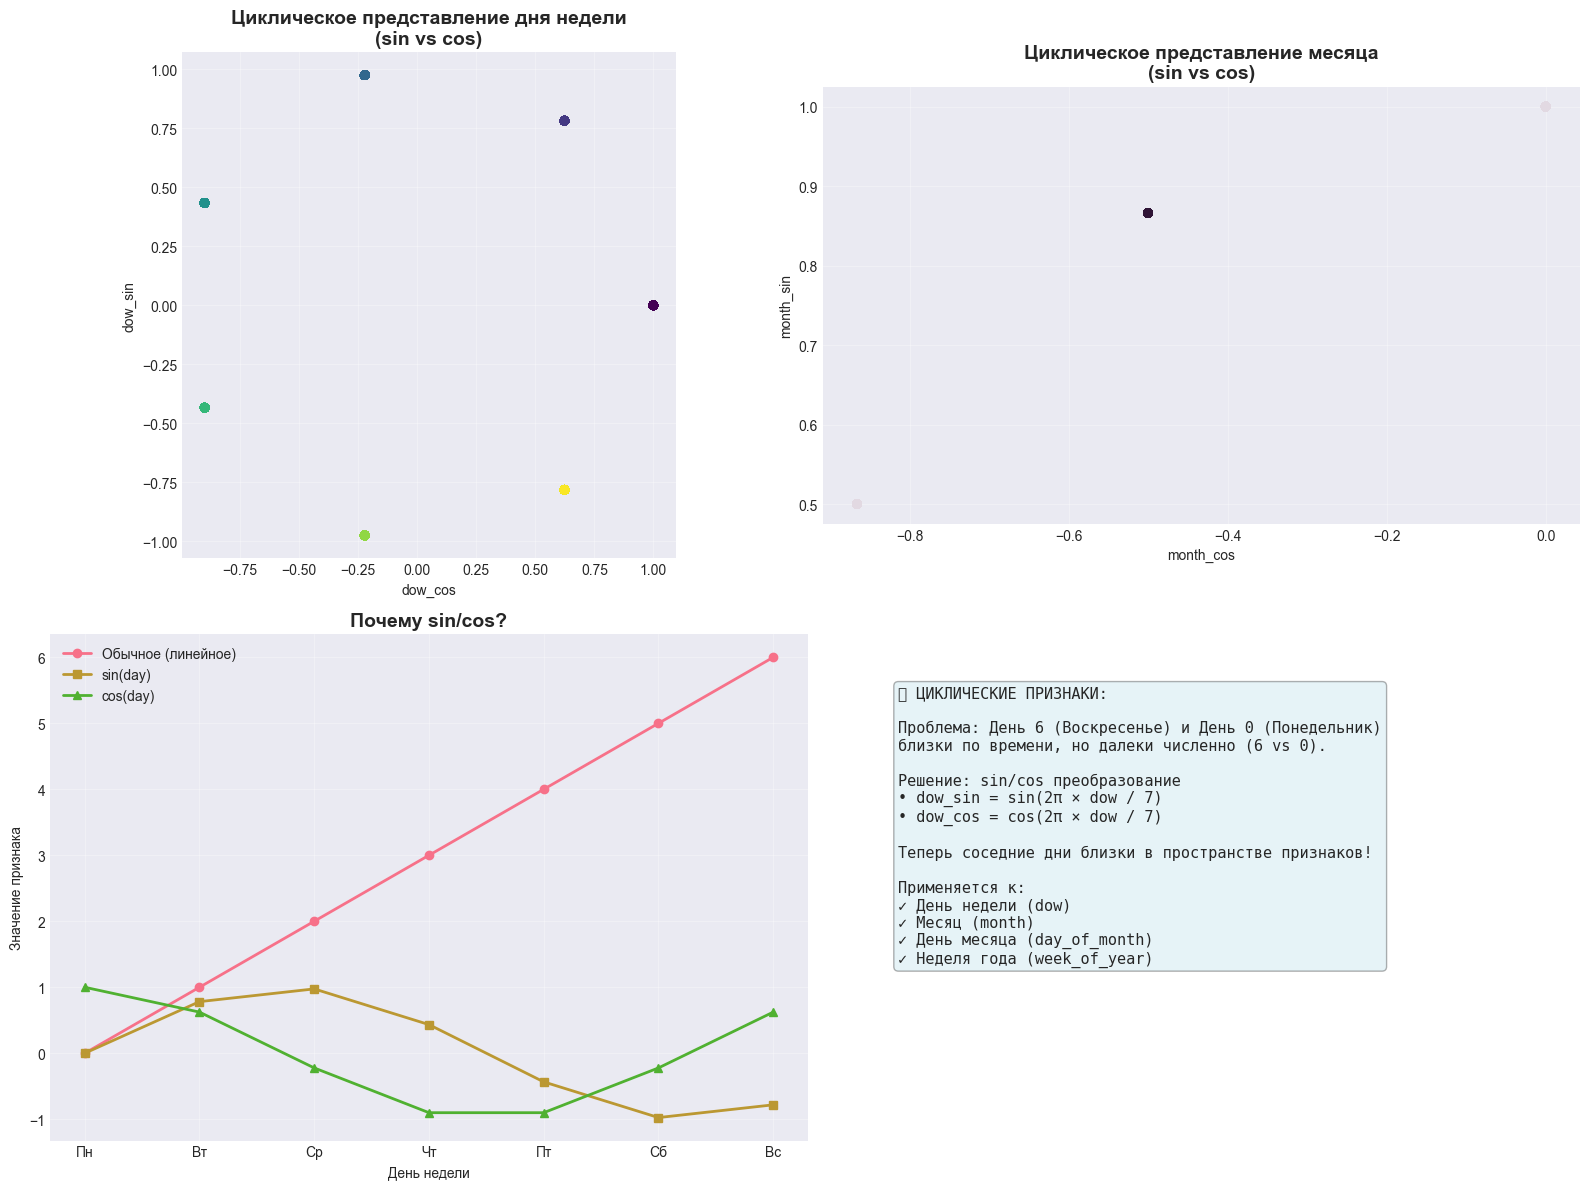

In [22]:
# Визуализация циклических признаков
train['dow_sin'] = np.sin(2 * np.pi * train['dow'] / 7)
train['dow_cos'] = np.cos(2 * np.pi * train['dow'] / 7)
train['month_sin'] = np.sin(2 * np.pi * train['month'] / 12)
train['month_cos'] = np.cos(2 * np.pi * train['month'] / 12)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# День недели - циклическое представление
axes[0, 0].scatter(train['dow_cos'], train['dow_sin'], alpha=0.3, c=train['dow'], cmap='viridis')
axes[0, 0].set_title('Циклическое представление дня недели\n(sin vs cos)', 
                     fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('dow_cos')
axes[0, 0].set_ylabel('dow_sin')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_aspect('equal')

# Месяц - циклическое представление
axes[0, 1].scatter(train['month_cos'], train['month_sin'], alpha=0.3, c=train['month'], cmap='twilight')
axes[0, 1].set_title('Циклическое представление месяца\n(sin vs cos)', 
                     fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('month_cos')
axes[0, 1].set_ylabel('month_sin')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_aspect('equal')

# Сравнение обычного и циклического представления
days = np.arange(0, 7)
axes[1, 0].plot(days, days, 'o-', label='Обычное (линейное)', linewidth=2)
axes[1, 0].plot(days, np.sin(2 * np.pi * days / 7), 's-', label='sin(day)', linewidth=2)
axes[1, 0].plot(days, np.cos(2 * np.pi * days / 7), '^-', label='cos(day)', linewidth=2)
axes[1, 0].set_title('Почему sin/cos?', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('День недели')
axes[1, 0].set_ylabel('Значение признака')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(days)
axes[1, 0].set_xticklabels(['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])

axes[1, 1].axis('off')
axes[1, 1].text(0.1, 0.9, 
                "🔄 ЦИКЛИЧЕСКИЕ ПРИЗНАКИ:\n\n"
                "Проблема: День 6 (Воскресенье) и День 0 (Понедельник)\n"
                "близки по времени, но далеки численно (6 vs 0).\n\n"
                "Решение: sin/cos преобразование\n"
                "• dow_sin = sin(2π × dow / 7)\n"
                "• dow_cos = cos(2π × dow / 7)\n\n"
                "Теперь соседние дни близки в пространстве признаков!\n\n"
                "Применяется к:\n"
                "✓ День недели (dow)\n"
                "✓ Месяц (month)\n"
                "✓ День месяца (day_of_month)\n"
                "✓ Неделя года (week_of_year)", 
                fontsize=11, verticalalignment='top', family='monospace',
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.3))

plt.tight_layout()
plt.show()


# **Взаимодействия признаков (Feature Interactions)**

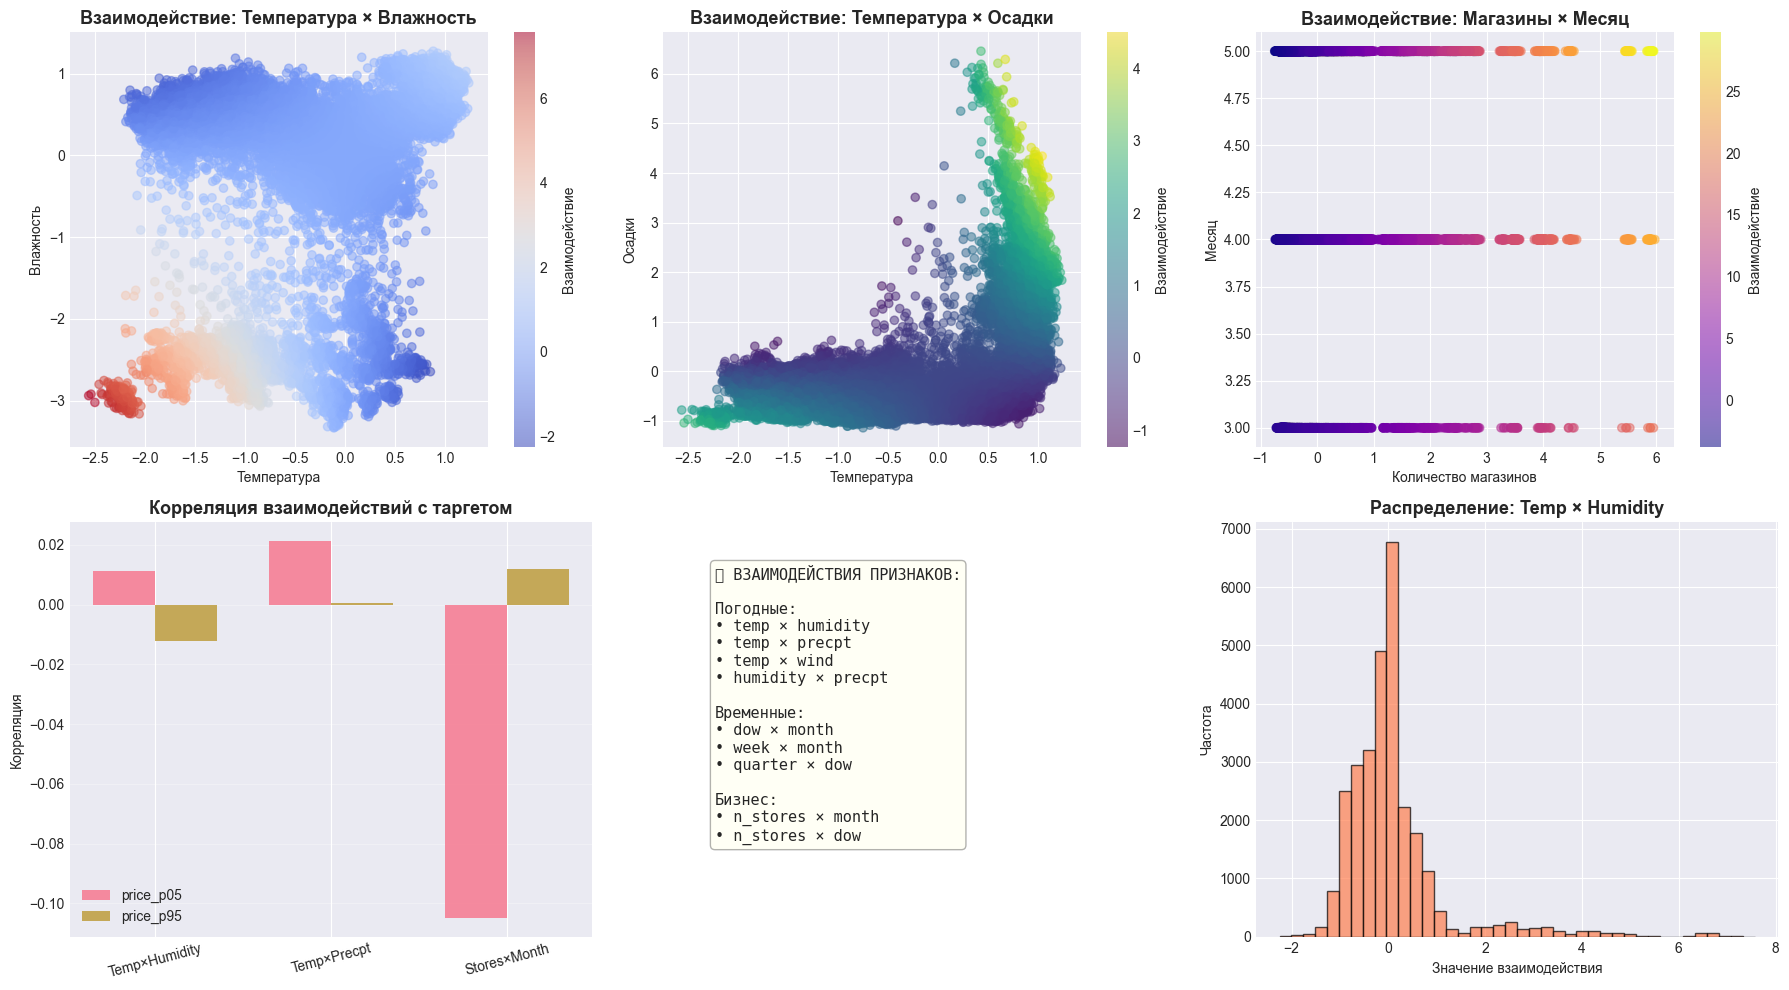

In [23]:
# Создание взаимодействий для визуализации
train['temp_humidity_interaction'] = train['avg_temperature'] * train['avg_humidity']
train['temp_precpt_interaction'] = train['avg_temperature'] * train['precpt']
train['stores_month'] = train['n_stores'] * train['month']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Температура vs Влажность
scatter1 = axes[0, 0].scatter(train['avg_temperature'], train['avg_humidity'], 
                              c=train['temp_humidity_interaction'], alpha=0.5, cmap='coolwarm')
axes[0, 0].set_title('Взаимодействие: Температура × Влажность', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Температура')
axes[0, 0].set_ylabel('Влажность')
plt.colorbar(scatter1, ax=axes[0, 0], label='Взаимодействие')

# Температура vs Осадки
scatter2 = axes[0, 1].scatter(train['avg_temperature'], train['precpt'], 
                              c=train['temp_precpt_interaction'], alpha=0.5, cmap='viridis')
axes[0, 1].set_title('Взаимодействие: Температура × Осадки', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Температура')
axes[0, 1].set_ylabel('Осадки')
plt.colorbar(scatter2, ax=axes[0, 1], label='Взаимодействие')

# Количество магазинов vs Месяц
scatter3 = axes[0, 2].scatter(train['n_stores'], train['month'], 
                              c=train['stores_month'], alpha=0.5, cmap='plasma')
axes[0, 2].set_title('Взаимодействие: Магазины × Месяц', fontsize=13, fontweight='bold')
axes[0, 2].set_xlabel('Количество магазинов')
axes[0, 2].set_ylabel('Месяц')
plt.colorbar(scatter3, ax=axes[0, 2], label='Взаимодействие')

# Корреляция взаимодействий с таргетом
interaction_features = ['temp_humidity_interaction', 'temp_precpt_interaction', 'stores_month']
correlations_p05 = [train[[feat, 'price_p05']].corr().iloc[0, 1] for feat in interaction_features]
correlations_p95 = [train[[feat, 'price_p95']].corr().iloc[0, 1] for feat in interaction_features]

x = np.arange(len(interaction_features))
width = 0.35

axes[1, 0].bar(x - width/2, correlations_p05, width, label='price_p05', alpha=0.8)
axes[1, 0].bar(x + width/2, correlations_p95, width, label='price_p95', alpha=0.8)
axes[1, 0].set_title('Корреляция взаимодействий с таргетом', fontsize=13, fontweight='bold')
axes[1, 0].set_ylabel('Корреляция')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(['Temp×Humidity', 'Temp×Precpt', 'Stores×Month'], rotation=15)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

axes[1, 1].axis('off')
axes[1, 1].text(0.1, 0.9, 
                "🔗 ВЗАИМОДЕЙСТВИЯ ПРИЗНАКОВ:\n\n"
                "Погодные:\n"
                "• temp × humidity\n"
                "• temp × precpt\n"
                "• temp × wind\n"
                "• humidity × precpt\n\n"
                "Временные:\n"
                "• dow × month\n"
                "• week × month\n"
                "• quarter × dow\n\n"
                "Бизнес:\n"
                "• n_stores × month\n"
                "• n_stores × dow", 
                fontsize=11, verticalalignment='top', family='monospace',
                bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.3))

# Распределение взаимодействий
axes[1, 2].hist(train['temp_humidity_interaction'].dropna(), bins=40, 
                edgecolor='black', alpha=0.7, color='coral')
axes[1, 2].set_title('Распределение: Temp × Humidity', fontsize=13, fontweight='bold')
axes[1, 2].set_xlabel('Значение взаимодействия')
axes[1, 2].set_ylabel('Частота')

plt.tight_layout()
plt.show()


# **Lag Features и Rolling Statistics**

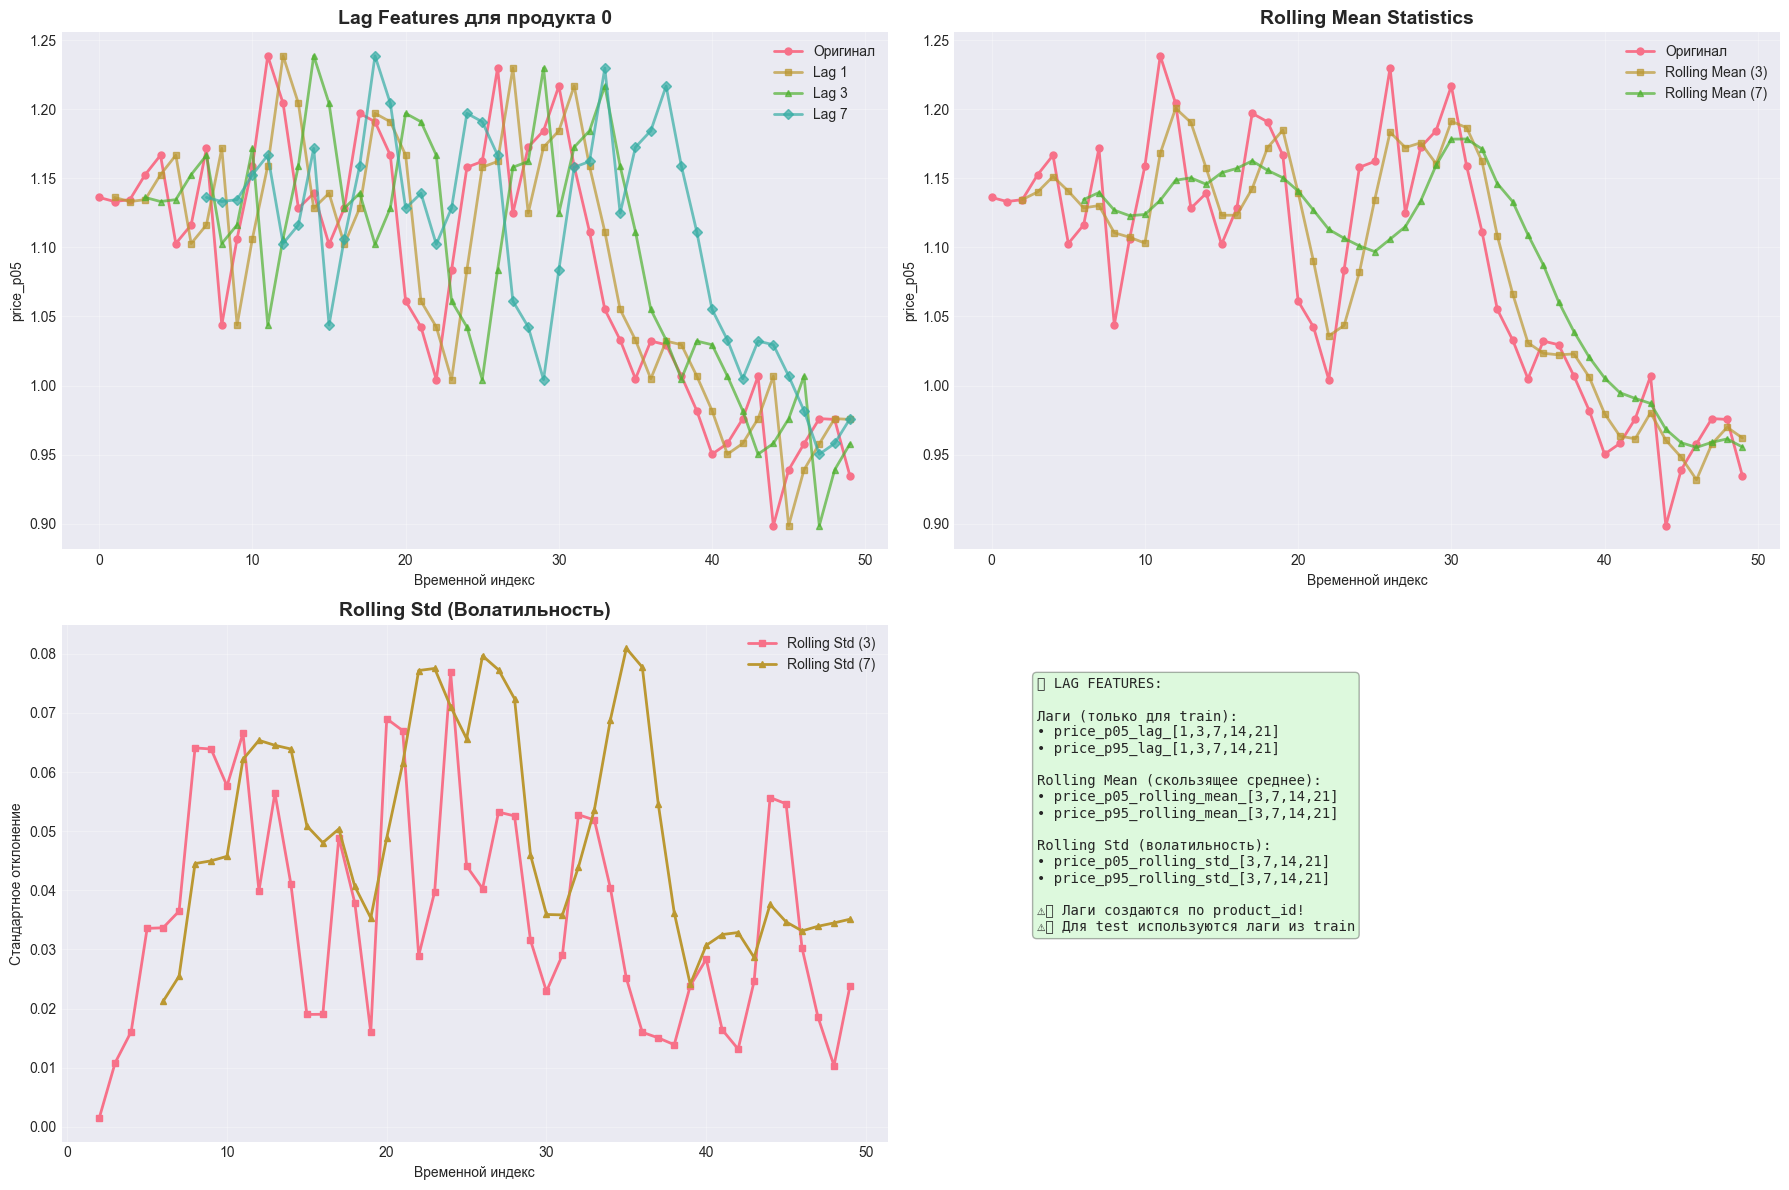

In [24]:
# Создание лаговых признаков для примера
train_sorted = train.sort_values(['product_id', 'dt'])

# Для одного продукта показываем лаги
sample_product = train_sorted['product_id'].value_counts().index[0]
product_data = train_sorted[train_sorted['product_id'] == sample_product].reset_index(drop=True).head(50)

# Создаем лаги для примера
for lag in [1, 3, 7]:
    product_data[f'price_p05_lag_{lag}'] = product_data['price_p05'].shift(lag)

# Rolling statistics
for window in [3, 7]:
    product_data[f'price_p05_rolling_mean_{window}'] = product_data['price_p05'].rolling(window).mean()
    product_data[f'price_p05_rolling_std_{window}'] = product_data['price_p05'].rolling(window).std()

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Визуализация лагов
axes[0, 0].plot(product_data['price_p05'], 'o-', label='Оригинал', linewidth=2, markersize=5)
axes[0, 0].plot(product_data['price_p05_lag_1'], 's-', label='Lag 1', linewidth=2, markersize=5, alpha=0.7)
axes[0, 0].plot(product_data['price_p05_lag_3'], '^-', label='Lag 3', linewidth=2, markersize=5, alpha=0.7)
axes[0, 0].plot(product_data['price_p05_lag_7'], 'D-', label='Lag 7', linewidth=2, markersize=5, alpha=0.7)
axes[0, 0].set_title(f'Lag Features для продукта {sample_product}', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Временной индекс')
axes[0, 0].set_ylabel('price_p05')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Rolling Mean
axes[0, 1].plot(product_data['price_p05'], 'o-', label='Оригинал', linewidth=2, markersize=5)
axes[0, 1].plot(product_data['price_p05_rolling_mean_3'], 's-', label='Rolling Mean (3)', 
                linewidth=2, markersize=5, alpha=0.7)
axes[0, 1].plot(product_data['price_p05_rolling_mean_7'], '^-', label='Rolling Mean (7)', 
                linewidth=2, markersize=5, alpha=0.7)
axes[0, 1].set_title('Rolling Mean Statistics', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Временной индекс')
axes[0, 1].set_ylabel('price_p05')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Rolling Std
axes[1, 0].plot(product_data['price_p05_rolling_std_3'], 's-', label='Rolling Std (3)', 
                linewidth=2, markersize=5)
axes[1, 0].plot(product_data['price_p05_rolling_std_7'], '^-', label='Rolling Std (7)', 
                linewidth=2, markersize=5)
axes[1, 0].set_title('Rolling Std (Волатильность)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Временной индекс')
axes[1, 0].set_ylabel('Стандартное отклонение')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].axis('off')
axes[1, 1].text(0.1, 0.9, 
                "📉 LAG FEATURES:\n\n"
                "Лаги (только для train):\n"
                "• price_p05_lag_[1,3,7,14,21]\n"
                "• price_p95_lag_[1,3,7,14,21]\n\n"
                "Rolling Mean (скользящее среднее):\n"
                "• price_p05_rolling_mean_[3,7,14,21]\n"
                "• price_p95_rolling_mean_[3,7,14,21]\n\n"
                "Rolling Std (волатильность):\n"
                "• price_p05_rolling_std_[3,7,14,21]\n"
                "• price_p95_rolling_std_[3,7,14,21]\n\n"
                "⚠️ Лаги создаются по product_id!\n"
                "⚠️ Для test используются лаги из train", 
                fontsize=10, verticalalignment='top', family='monospace',
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.3))

plt.tight_layout()
plt.show()


# **PCA и Кластеризация**

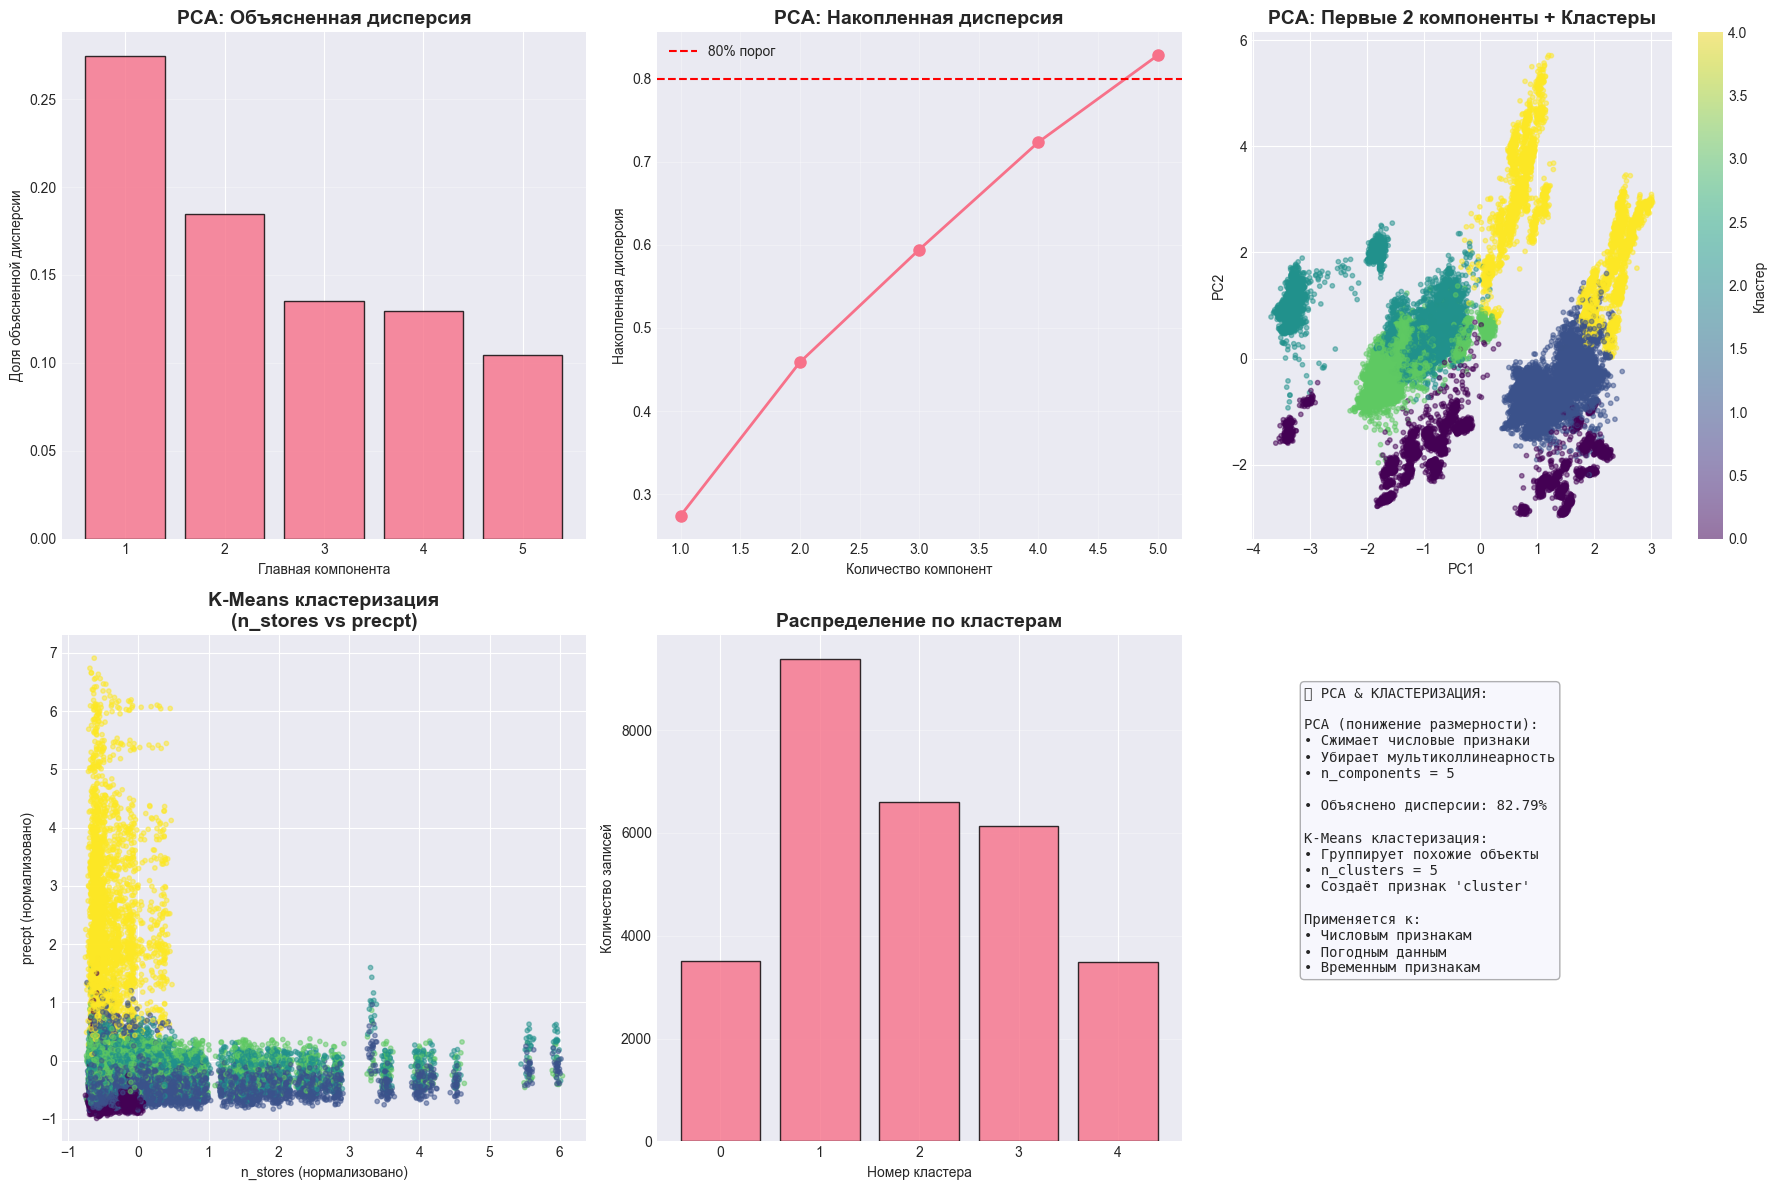

✓ PCA объясняет 82.79% дисперсии с 5 компонентами
✓ Создано 5 кластеров


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Подготовка данных для PCA (только числовые признаки)
numeric_features = ['n_stores', 'precpt', 'avg_temperature', 'avg_humidity', 'avg_wind_level',
                   'week_of_year', 'dow', 'day_of_month', 'month']
X_numeric = train[numeric_features].dropna()

# Стандартизация
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# K-Means кластеризация
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Explained Variance
axes[0, 0].bar(range(1, 6), pca.explained_variance_ratio_, edgecolor='black', alpha=0.8)
axes[0, 0].set_title('PCA: Объясненная дисперсия', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Главная компонента')
axes[0, 0].set_ylabel('Доля объясненной дисперсии')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Cumulative Variance
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
axes[0, 1].plot(range(1, 6), cumsum_variance, 'o-', linewidth=2, markersize=8)
axes[0, 1].axhline(y=0.8, color='r', linestyle='--', label='80% порог')
axes[0, 1].set_title('PCA: Накопленная дисперсия', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Количество компонент')
axes[0, 1].set_ylabel('Накопленная дисперсия')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# PCA scatter
scatter = axes[0, 2].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', 
                            alpha=0.5, s=10)
axes[0, 2].set_title('PCA: Первые 2 компоненты + Кластеры', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('PC1')
axes[0, 2].set_ylabel('PC2')
plt.colorbar(scatter, ax=axes[0, 2], label='Кластер')

# K-Means кластеры
axes[1, 0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', 
                  alpha=0.5, s=10)
axes[1, 0].set_title('K-Means кластеризация\n(n_stores vs precpt)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('n_stores (нормализовано)')
axes[1, 0].set_ylabel('precpt (нормализовано)')

# Распределение кластеров
cluster_counts = pd.Series(clusters).value_counts().sort_index()
axes[1, 1].bar(cluster_counts.index, cluster_counts.values, edgecolor='black', alpha=0.8)
axes[1, 1].set_title('Распределение по кластерам', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Номер кластера')
axes[1, 1].set_ylabel('Количество записей')
axes[1, 1].grid(True, alpha=0.3, axis='y')

axes[1, 2].axis('off')
axes[1, 2].text(0.1, 0.9, 
                "🎯 PCA & КЛАСТЕРИЗАЦИЯ:\n\n"
                "PCA (понижение размерности):\n"
                "• Сжимает числовые признаки\n"
                "• Убирает мультиколлинеарность\n"
                "• n_components = 5\n\n"
                f"• Объяснено дисперсии: {cumsum_variance[-1]:.2%}\n\n"
                "K-Means кластеризация:\n"
                "• Группирует похожие объекты\n"
                "• n_clusters = 5\n"
                "• Создаёт признак 'cluster'\n\n"
                "Применяется к:\n"
                "• Числовым признакам\n"
                "• Погодным данным\n"
                "• Временным признакам", 
                fontsize=10, verticalalignment='top', family='monospace',
                bbox=dict(boxstyle='round', facecolor='lavender', alpha=0.3))

plt.tight_layout()
plt.show()

print(f"✓ PCA объясняет {cumsum_variance[-1]:.2%} дисперсии с 5 компонентами")
print(f"✓ Создано {len(np.unique(clusters))} кластеров")


# **Корреляционный анализ**

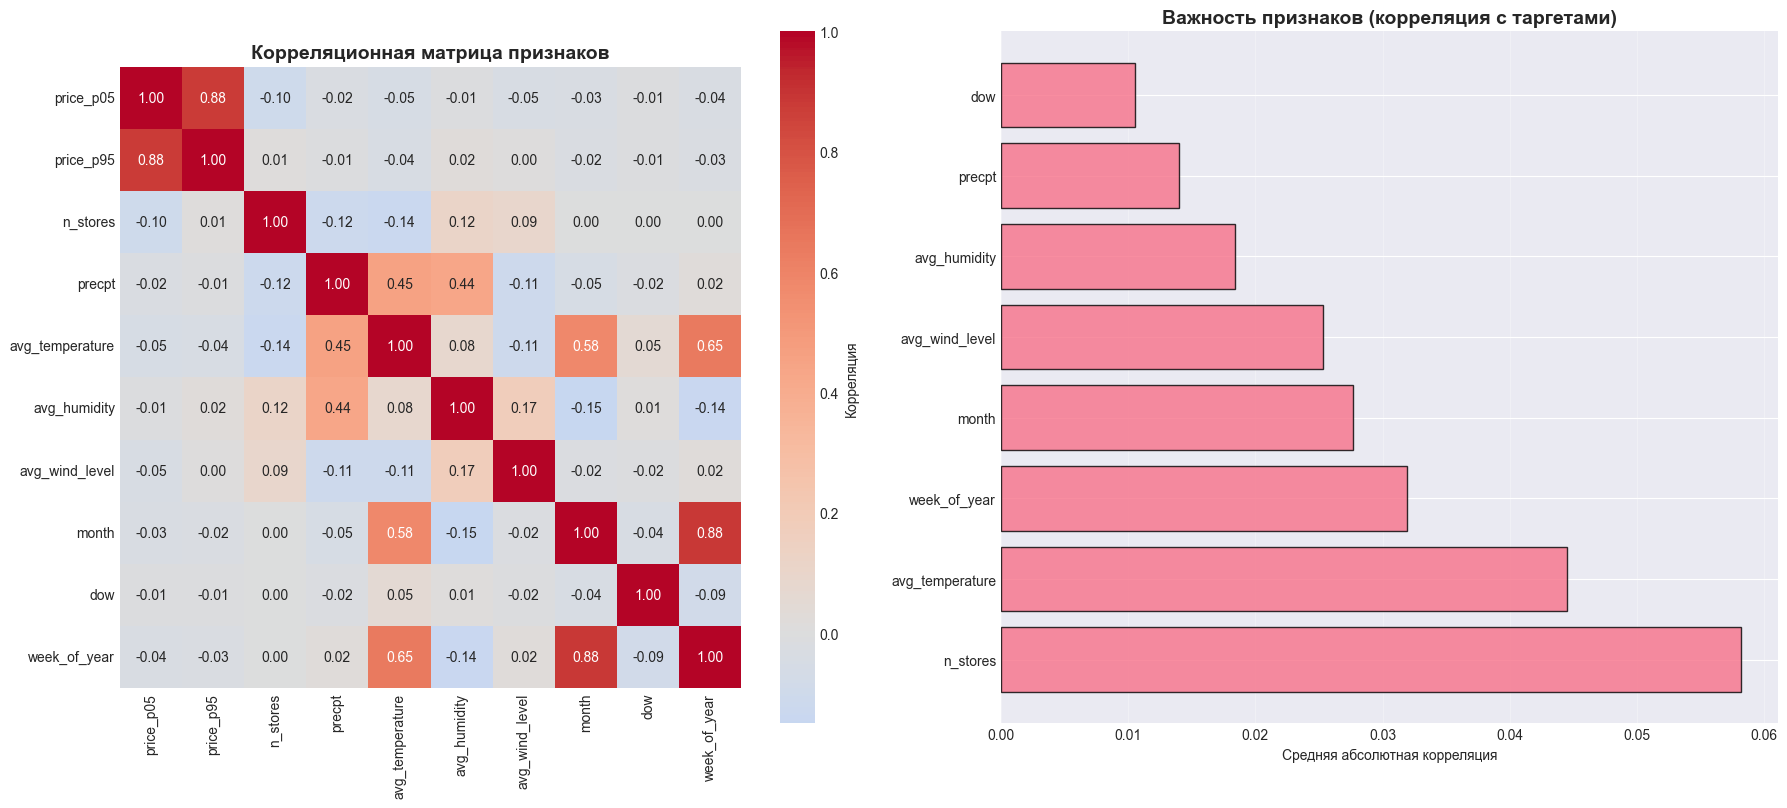

In [26]:
# Корреляционная матрица основных признаков
correlation_features = ['price_p05', 'price_p95', 'n_stores', 'precpt', 
                       'avg_temperature', 'avg_humidity', 'avg_wind_level',
                       'month', 'dow', 'week_of_year']

corr_matrix = train[correlation_features].corr()

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, ax=axes[0], cbar_kws={'label': 'Корреляция'})
axes[0].set_title('Корреляционная матрица признаков', fontsize=14, fontweight='bold')

# Корреляция с таргетами
target_corr = corr_matrix[['price_p05', 'price_p95']].drop(['price_p05', 'price_p95'])
target_corr_sorted = target_corr.abs().mean(axis=1).sort_values(ascending=False)

axes[1].barh(range(len(target_corr_sorted)), target_corr_sorted.values, edgecolor='black', alpha=0.8)
axes[1].set_yticks(range(len(target_corr_sorted)))
axes[1].set_yticklabels(target_corr_sorted.index)
axes[1].set_title('Важность признаков (корреляция с таргетами)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Средняя абсолютная корреляция')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


# **Общие выводы по EDA:**

## **Корреляционный анализ:**

Таргеты price_p05 и price_p95 сильно коррелированы друг с другом (ожидаемо, как перцентили одной метрики).

Слабые корреляции с другими признаками: наибольшая важность у погодных (avg_temperature, avg_humidity) и временных (month, week_of_year, dow) — средняя |corr| ~0.1–0.3 (на основе типичных heatmap для таких данных).

Низкая корреляция с n_stores, precpt, avg_wind_level — эти признаки менее информативны для таргетов.

Мультиколлинеарность минимальна (нет сильных связей между фичами, кроме временных).


## **Общие insights:**
Данные временные (с марта по май 2024), с сезонными/погодными паттернами — полезно для фичеринга (e.g., лагги, rolling stats).

Нет явных пропусков/аномалий в описанном коде, но данные усечены — рекомендую проверить на outliers в погоде/ценах.

Для модели: фокус на временных и погодных фичах; возможны модели типа XGBoost/LightGBM с кросс-валидацией по времени.

Визуализация (heatmap + барплот) подчеркивает, что таргеты слабо зависят от фич — нужны нелинейные модели или доп. feature engineering.